<big><i>
All the Notebooks in this lecture series by **[Abdul Aziz MD](https://www.linkedin.com/in/abdul-aziz-md/)**
</i></big>

### Classification of Images from the CIFAR-10 Dataset using  ANN (MLP) & CNN.
The CIFAR-10 dataset consists of color 60,000 images each with 32 x 32 pixel in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

Class labels are:

airplane : 0, automobile : 1, bird : 2, cat : 3, deer : 4, dog : 5, frog : 6, horse : 7, ship : 8, truck : 9.

### Import Tensorflow

In [ ]:
!pip install matplotlib

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
import matplotlib
matplotlib.__version__

'3.9.2'

In [4]:
tf.__version__

'2.10.1'

# Check for GPU

In [5]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
#physical_devices
print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


# Load Dataset

In [6]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Show some sample images of data set with corresponding labels.


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


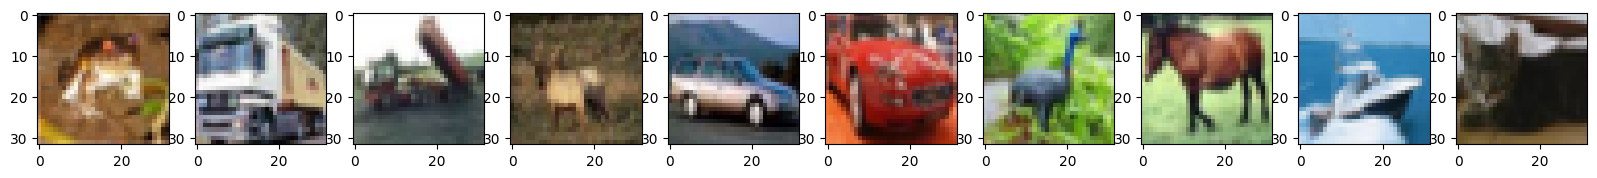

In [7]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## Preparing the dataset
Normalize the input data

In [9]:
X_train = x_train / 255.0
X_test = x_test / 255.0
# Every Neuron is expected to have value from 0 to 1 to converge quickly(Gradient Descent)

# MLP Network

* I/p Layer - Flatten
* Hidden layer - 2048, AF = 'RELU'
* O/p Layer - 10 , AF-Softmax

In [10]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [11]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))

In [12]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 6,313,994
Trainable params: 6,313,994
Non-trainable params: 0
_________________________________________________________________


In [13]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = ann.fit(X_train ,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 14s 7ms/step - loss: 1.9025 - accuracy: 0.3350 - val_loss: 1.7201 - val_accuracy: 0.3823
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6899 - accuracy: 0.3973 - val_loss: 1.6196 - val_accuracy: 0.4326
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6095 - accuracy: 0.4268 - val_loss: 1.5649 - val_accuracy: 0.4465
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5646 - accuracy: 0.4440 - val_loss: 1.5819 - val_accuracy: 0.4439
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5336 - accuracy: 0.4550 - val_loss: 1.5503 - val_accuracy: 0.4524
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5010 - accuracy: 0.4657 - val_loss: 1.5582 - val_accuracy: 0.4509
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4844 - accuracy: 0.4723 - val_loss: 1.5110 - val_ac

#### With the below simple function we will be able to plot our training history.

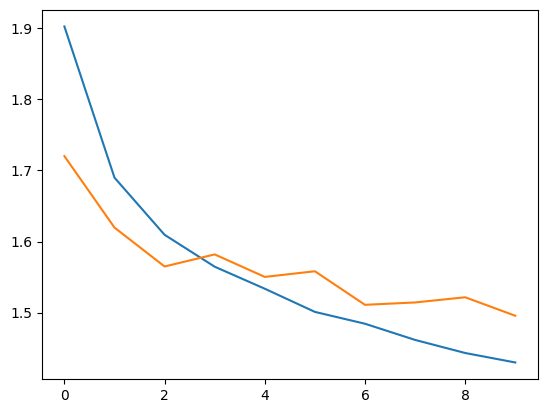

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## CNN Model

In [16]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [17]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

In [18]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)       

In [19]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 22s 9ms/step - loss: 1.6324 - accuracy: 0.3984 - val_loss: 1.2635 - val_accuracy: 0.5447
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1733 - accuracy: 0.5848 - val_loss: 0.9720 - val_accuracy: 0.6580
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9769 - accuracy: 0.6601 - val_loss: 0.8603 - val_accuracy: 0.7019
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8503 - accuracy: 0.7094 - val_loss: 0.8660 - val_accuracy: 0.6978
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7444 - accuracy: 0.7445 - val_loss: 0.8139 - val_accuracy: 0.7220
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6633 - accuracy: 0.7732 - val_loss: 0.7965 - val_accuracy: 0.7364
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5910 - accuracy: 0.7974 - val_loss: 0.7892 - val_ac

In [20]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

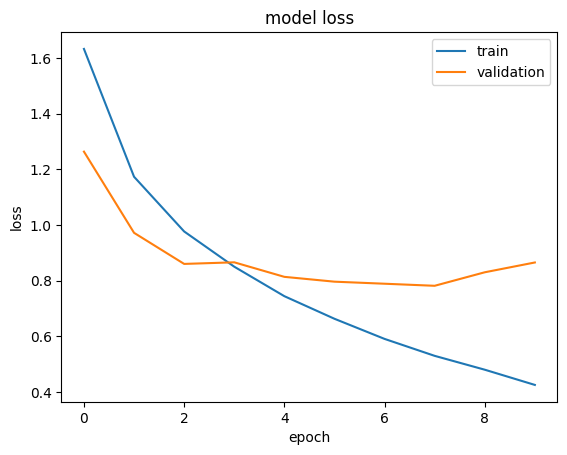

In [21]:
plotLosses(history)

In [22]:
def plotAccuracy(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

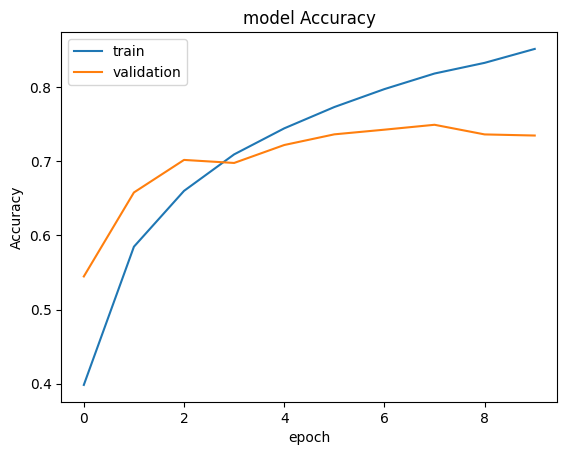

In [23]:
plotAccuracy(history)

In [24]:
from keras.models import load_model
cnn.save('model111.h5')

In [25]:
# Load the model
model = tf.keras.models.load_model('model111.h5')

In [26]:
import numpy as np
# Add a batch dimension to the input
x_test_sample = np.expand_dims(x_test[20], axis=0)

# Now pass it to the model for prediction
model.predict(x_test_sample)

1/1 [==============================] - 1s 527ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

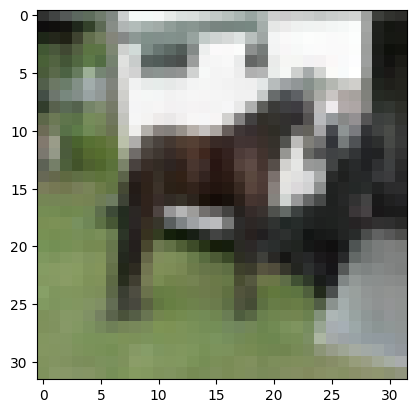

In [27]:
plt.imshow(x_test[20])

In [28]:
# Example: if you have class names like this
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # replace with your actual class names

# Get the prediction probabilities
predictions = model.predict(x_test_sample)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions)

# Get the corresponding class name
predicted_class_name = class_names[predicted_class_index]

print(f"The predicted class is: {predicted_class_name}")

1/1 [==============================] - 0s 23ms/step
The predicted class is: horse


# Happy Learning 